<h1 align="center">Twitter US Airline Sentiment</h1>

<center><p float="center">
  <img src="https://cdn4.premiumread.com/?url=https://malaymail.com/malaymail/uploads/images/2022/07/16/33176.jpg&w=800&q=100&f=jpg&t=2" width="700" height="300"/>

### Background and Context

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

### Data Description

The dataset has the following columns:

* tweet_id                                                           
* airline_sentiment                                               
* airline_sentiment_confidence                               
* negativereason                                                   
* negativereason_confidence                                    
* airline                                                                    
* airline_sentiment_gold                                              
* name     
* negativereason_gold 
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location 
* user_timezone

### Importing the libraries

In [1]:
import re
import numpy as np                                  
import pandas as pd                                
import nltk                                         

nltk.download('stopwords')    
nltk.download('punkt')

from nltk.corpus import stopwords                   
from nltk.stem import PorterStemmer                 
from nltk.tokenize import word_tokenize 

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF



# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt   
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score      

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
df = pd.read_csv('Tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.shape

(14640, 15)

* This data has 15 columns and 14640 rows

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

* Some columns have null values so we will have to check that.
* We will need to convert some of the columns to their appropriate data types

In [6]:
# checking for null values
df.isnull().sum(axis=0)   

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

* Some columns have a lot of null values.
* It will best to drop these columns which have a lot of null values

### Exploratory Data analysis

In [7]:
import seaborn as sns

<Axes: xlabel='airline', ylabel='count'>

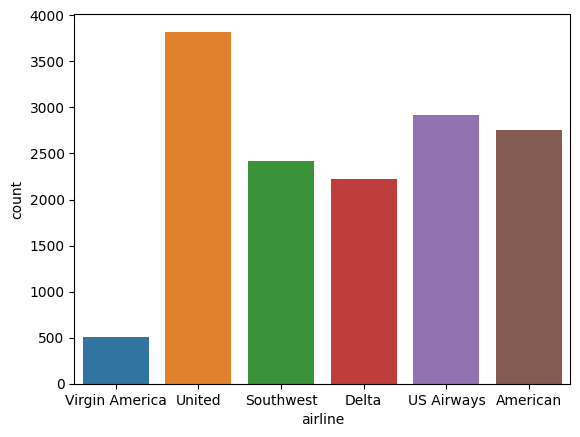

In [8]:
sns.countplot(data=df,x='airline')

* United Airline seems to be the airline with the most tweets followed by US Airways
* Virgin America has the least tweets associtated with their airline

<Axes: xlabel='airline', ylabel='count'>

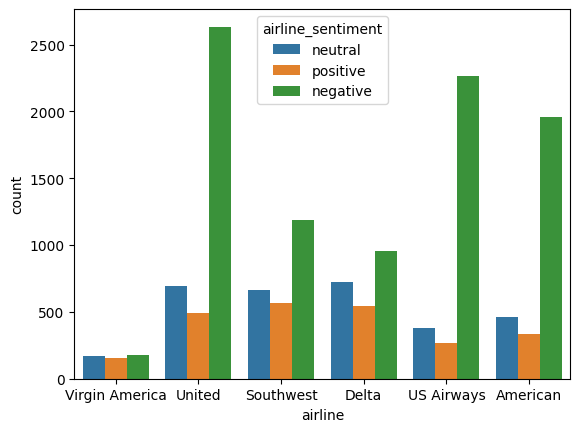

In [9]:
sns.countplot(data=df,x='airline',hue='airline_sentiment')

* We can see that United Airways has so many negative comments as compared to the other airlines. This might because it has more tweets associated with them than other airlines. 
* US Airways also has more negative comments.
* It seems there are more negative comments than positive in most cases for the various airlines

In [10]:
from wordcloud import WordCloud,STOPWORDS

In [11]:
from sklearn.preprocessing import LabelEncoder
#
# Instantiate LabelEncoder
#
le = LabelEncoder()
#
# Encode single column status
#
df['sentiment'] = le.fit_transform(df.airline_sentiment)
#
# Print df.head for checking the transformation
#
df.head

<bound method NDFrame.head of                  tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason

In [12]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0


#### Creating a world Cloud for negative reason

In [13]:
#creating word cloud for negative reasons
negative_reviews=df[df['sentiment']==0]
words = ' '.join(negative_reviews['negativereason'])
cleaned_word = " ".join([word for word in words.split()])

In [14]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

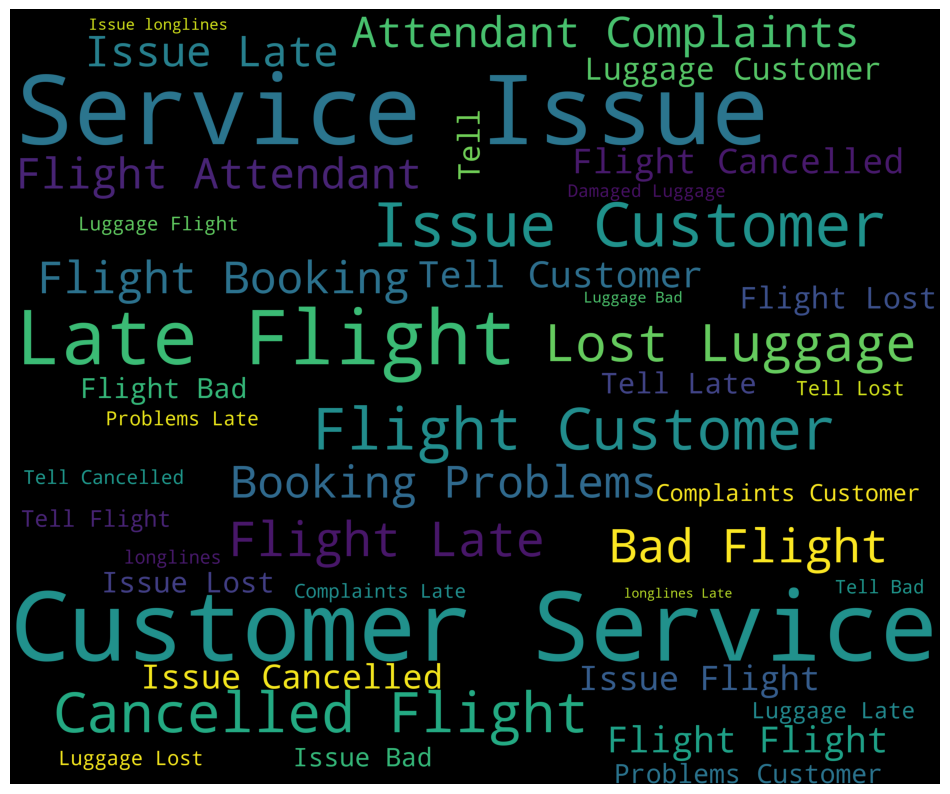

In [15]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* For this world cloud distribution for negative reasons,we identified some frequent words that appear for ehen a sentiment is negative
* **Service issue,Luggage lost,Damaged Luggage,flight booking, etc.** Are some of the reasons for a tweet being negative

<Axes: xlabel='airline_sentiment', ylabel='count'>

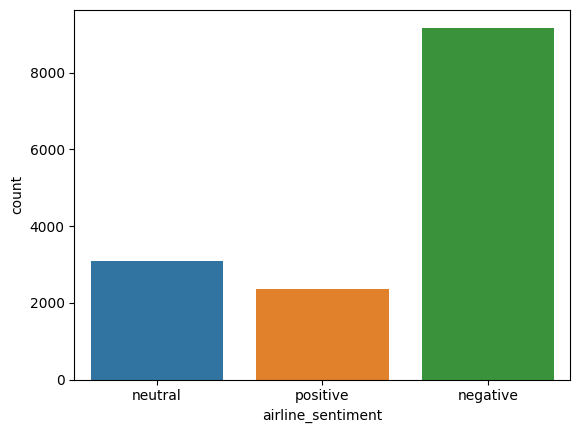

In [16]:
sns.countplot(data=df,x='airline_sentiment')

* It looks like majority of the tweets are negative tweets.
* Positive tweets have the lowest counts

#### Creating a world Cloud for negative tweets

In [17]:
#creating word cloud for negative reasons
negative_reviews=df[df['sentiment']==0]
words = ' '.join(negative_reviews['text'])
cleaned_word = " ".join([word for word in words.split()])

In [18]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

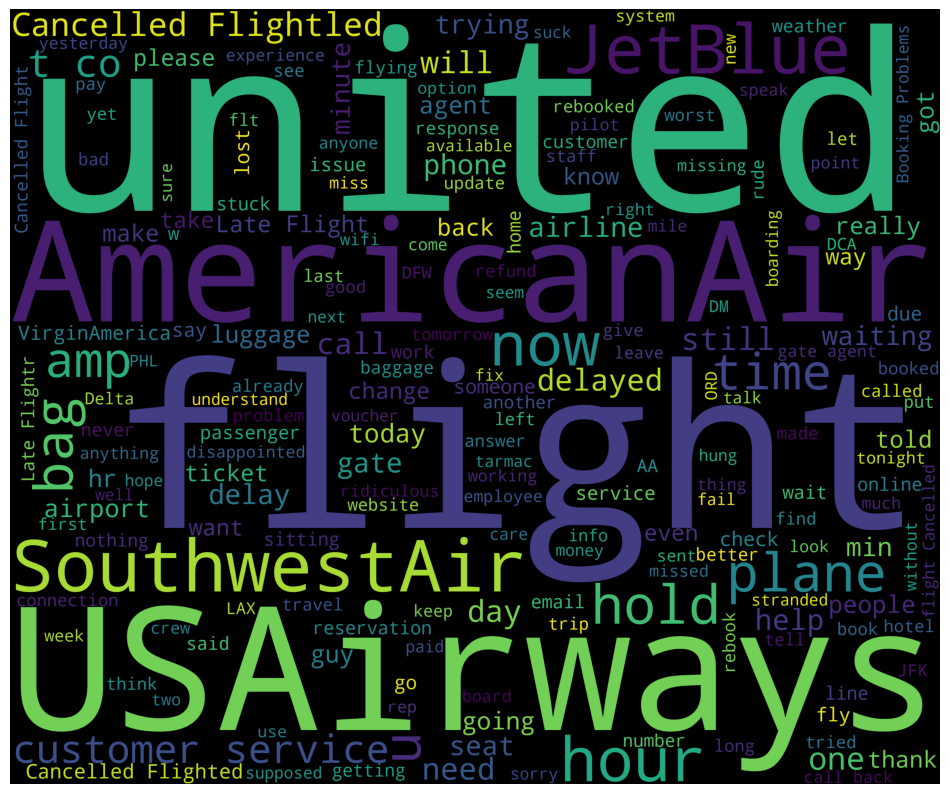

In [19]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* Most of the words associated with negative sentiments include *customer service,delayed,cancelled flight* . This could mean bad customer service and delayed fights are part of the reason why people tweet negative stuff abour airlines.

#### Creating a world Cloud for positive tweets

In [20]:
#creating word cloud for negative reasons
negative_reviews=df[df['sentiment']==2]
words = ' '.join(negative_reviews['text'])
cleaned_word = " ".join([word for word in words.split()])

In [21]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

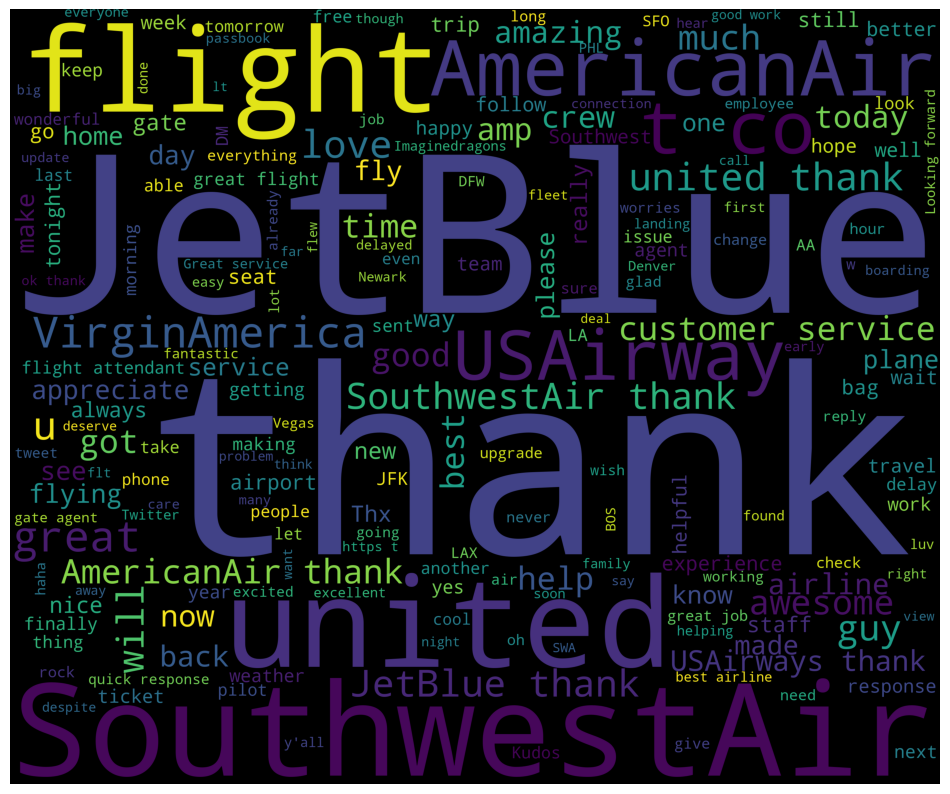

In [22]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Dropping unwanted columns

In [23]:
data = df.copy()

In [24]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0


In [25]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
sentiment                           0
dtype: int64

In [26]:
data.drop(['tweet_id','negativereason','negativereason_confidence','airline_sentiment_gold','name','negativereason_gold',
          'tweet_coord','tweet_location','user_timezone','tweet_created'],axis=1,inplace=True)

In [27]:
data.head()

,airline_sentiment,airline_sentiment_confidence,airline,retweet_count,text,sentiment
0,neutral,1.0000,Virgin America,0,@VirginAmerica What @dhepburn said.,1
1,positive,0.3486,Virgin America,0,@VirginAmerica plus you've added commercials t...,2
2,neutral,0.6837,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,1
3,negative,1.0000,Virgin America,0,@VirginAmerica it's really aggressive to blast...,0
4,negative,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,0


* Columns have been dropped successfully

### Data Pre-processing

In [28]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [29]:
# removing htmltags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))

data.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14200\815336651.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,airline_sentiment,airline_sentiment_confidence,airline,retweet_count,text,sentiment
0,neutral,1.0000,Virgin America,0,@VirginAmerica What @dhepburn said.,1
1,positive,0.3486,Virgin America,0,@VirginAmerica plus you've added commercials t...,2
2,neutral,0.6837,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,1
3,negative,1.0000,Virgin America,0,@VirginAmerica it's really aggressive to blast...,0
4,negative,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,0


* We succesfuuly removed all html tags

In [30]:
pd.set_option('display.max_colwidth', None)

In [31]:
# #expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))

data.head(20)

,airline_sentiment,airline_sentiment_confidence,airline,retweet_count,text,sentiment
0,neutral,1.0000,Virgin America,0,@VirginAmerica What @dhepburn said.,1
1,positive,0.3486,Virgin America,0,@VirginAmerica plus you have added commercials to the experience... tacky.,2
2,neutral,0.6837,Virgin America,0,@VirginAmerica I did not today... Must mean I need to take another trip!,1
3,negative,1.0000,Virgin America,0,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",0
4,negative,1.0000,Virgin America,0,@VirginAmerica and it is a really big bad thing about it,0
5,negative,1.0000,Virgin America,0,@VirginAmerica seriously would pay $30 a flight for seats that did not have this playing.\nit is really the only bad thing about flying VA,0
6,positive,0.6745,Virgin America,0,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” will not go away :)",2
7,neutral,0.6340,Virgin America,0,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",1
8,positive,0.6559,Virgin America,0,"@virginamerica Well, I did not…but NOW I DO! :-D",2
9,positive,1.0000,Virgin America,0,"@VirginAmerica it was amazing, and arrived an hour early. You are too good to me.",2


In [32]:
# removing numbers
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

,airline_sentiment,airline_sentiment_confidence,airline,retweet_count,text,sentiment
0,neutral,1.0000,Virgin America,0,@VirginAmerica What @dhepburn said.,1
1,positive,0.3486,Virgin America,0,@VirginAmerica plus you have added commercials to the experience... tacky.,2
2,neutral,0.6837,Virgin America,0,@VirginAmerica I did not today... Must mean I need to take another trip!,1
3,negative,1.0000,Virgin America,0,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",0
4,negative,1.0000,Virgin America,0,@VirginAmerica and it is a really big bad thing about it,0


* We successfully removed all numbers

In [33]:
import nltk
import re
import unicodedata
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download the wordnet resource
nltk.download('wordnet')
nltk.download('stopwords')


# Create a set of stopwords
stop_words = set(stopwords.words('english'))

# Create a lemmatizer instance
lemmatizer = WordNetLemmatizer()

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(text):
    words = nltk.word_tokenize(text)
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

# Apply normalization to the 'text' column
data['normalized_text'] = data['text'].apply(normalize)

print(data)


[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


      airline_sentiment  airline_sentiment_confidence         airline  \
0               neutral                        1.0000  Virgin America   
1              positive                        0.3486  Virgin America   
2               neutral                        0.6837  Virgin America   
3              negative                        1.0000  Virgin America   
4              negative                        1.0000  Virgin America   
...                 ...                           ...             ...   
14635          positive                        0.3487        American   
14636          negative                        1.0000        American   
14637           neutral                        1.0000        American   
14638          negative                        1.0000        American   
14639           neutral                        0.6771        American   

       retweet_count  \
0                  0   
1                  0   
2                  0   
3                  0   
4  

In [34]:
data.head(20)

,airline_sentiment,airline_sentiment_confidence,airline,retweet_count,text,sentiment,normalized_text
0,neutral,1.0000,Virgin America,0,@VirginAmerica What @dhepburn said.,1,virginamerica dhepburn say
1,positive,0.3486,Virgin America,0,@VirginAmerica plus you have added commercials to the experience... tacky.,2,virginamerica plus add commercials experience tacky
2,neutral,0.6837,Virgin America,0,@VirginAmerica I did not today... Must mean I need to take another trip!,1,virginamerica today must mean need take another trip
3,negative,1.0000,Virgin America,0,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",0,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,1.0000,Virgin America,0,@VirginAmerica and it is a really big bad thing about it,0,virginamerica really big bad thing
5,negative,1.0000,Virgin America,0,@VirginAmerica seriously would pay $ a flight for seats that did not have this playing.\nit is really the only bad thing about flying VA,0,virginamerica seriously would pay flight seat play really bad thing fly va
6,positive,0.6745,Virgin America,0,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” will not go away :)",2,virginamerica yes nearly every time fly vx ear worm go away
7,neutral,0.6340,Virgin America,0,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpGgrEZP",1,virginamerica really miss prime opportunity men without hat parody https tcomwpggrezp
8,positive,0.6559,Virgin America,0,"@virginamerica Well, I did not…but NOW I DO! :-D",2,virginamerica well notbut
9,positive,1.0000,Virgin America,0,"@VirginAmerica it was amazing, and arrived an hour early. You are too good to me.",2,virginamerica amaze arrive hour early good


* We were able to preprocess the data and remove all sort of noise.
* We were able succesfully remove stop words and special characters
* Our data has been preprocessed and is ready for building a model.

In [35]:
data.drop(['text','airline_sentiment','airline_sentiment_confidence','airline','retweet_count'],axis=1,inplace=True)

In [36]:
data.head(10)

,sentiment,normalized_text
0,1,virginamerica dhepburn say
1,2,virginamerica plus add commercials experience tacky
2,1,virginamerica today must mean need take another trip
3,0,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,0,virginamerica really big bad thing
5,0,virginamerica seriously would pay flight seat play really bad thing fly va
6,2,virginamerica yes nearly every time fly vx ear worm go away
7,1,virginamerica really miss prime opportunity men without hat parody https tcomwpggrezp
8,2,virginamerica well notbut
9,2,virginamerica amaze arrive hour early good


### Supervised Learning for Sentiment Analysis

#### Bag of Words(CountVectorizer)

In BoW, we construct a dictionary that contains the set of all unique words from our text review dataset. The frequency of the word is counted here. If there are d unique words in our dictionary then for every review the vector will be of length d and count of word from reviews is stored at its particular location in vector. The vector will be highly sparse in such cases.

In [37]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                
data_features = bow_vec.fit_transform(data['normalized_text'])

data_features = data_features.toarray()                        

In [38]:
data_features.shape

(14640, 2000)

In [39]:
labels = data['sentiment']
labels = labels.astype('int')

In [40]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [41]:
# Using Random Forest to build model for the sentiment of a text .
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.703620218579235


* We built our model and it seems to be performing poorly.
* We are getting a score of 0.70 from the model

#### Optimizing the parameter: Number of trees in the random forest model(n_estimators)

In [42]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [43]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

* Successfully implemented Cross Validation

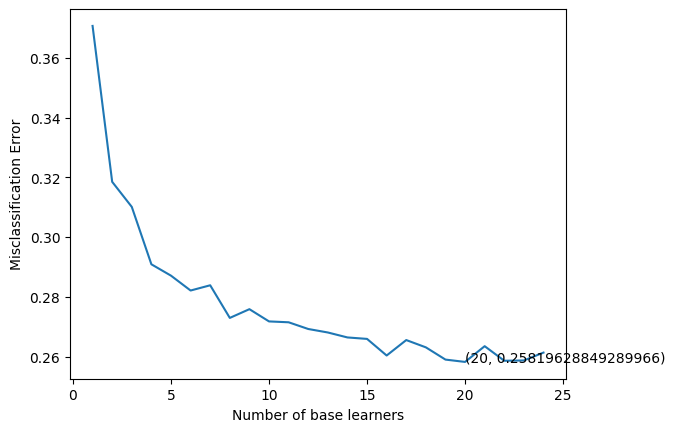

In [44]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [45]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7490892531876139

* We had an accuracy of 0.75 which is higher than what we got with the first model.

In [46]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

In [47]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['0' , '1','2']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      2814
           1       0.55      0.46      0.50       884
           2       0.71      0.60      0.65       694

    accuracy                           0.75      4392
   macro avg       0.69      0.65      0.67      4392
weighted avg       0.74      0.75      0.75      4392

Accuracy of the model is :  0.7529599271402551


[[2482  233   99]
 [ 405  411   68]
 [ 177  103  414]]


<Axes: >

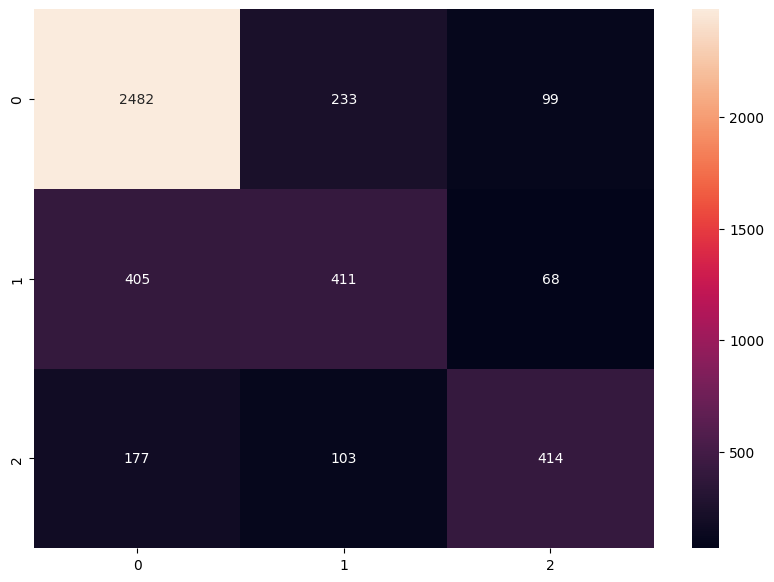

In [48]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1','2']],
                  columns = [i for i in ['0', '1','2']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

* The model is not working so well as shown from the confusion matrix.

thank,jetblue,great,delay,flight,http,unite,usairways,hours,cancel,southwestair,love,virginamerica,hold,get,awesome,americanair,bag,amaze,hour,please,call,customer,time,make,help,wait,fly,go,service,dm,say,follow,lose,need,guy,us,still,good,appreciate,
 
 


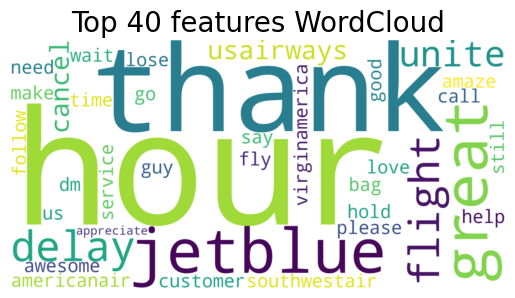

In [49]:
all_features = bow_vec.get_feature_names_out()            #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

* Words like **delay,cancel, help and hour** are some of the woords that make part of the top 40 words.

#### TF-IDF(Term Frequency - Inverse Document Frequency)

In [50]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=500)
data_features = tfidf_vect.fit_transform(data['normalized_text'])

data_features = data_features.toarray()

data_features.shape     #feature shape

(14640, 500)

In [51]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [52]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6727459016393442


* Over here, we are getting a score of 0.68 approximately
* As compared to our first model, this model is performing really badly.

In [54]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

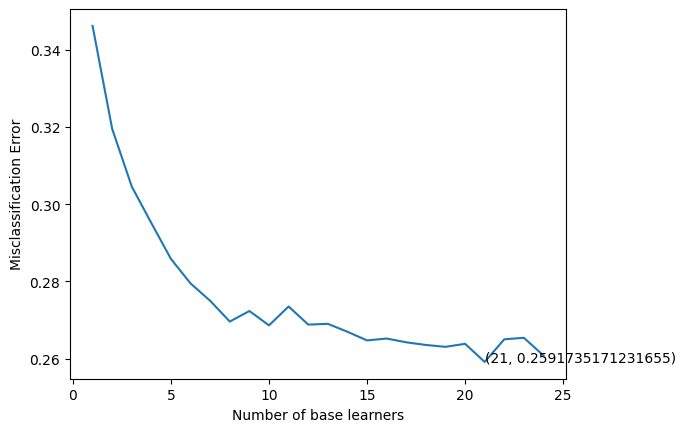

In [55]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [56]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
tf_idf_predicted = clf.predict(X_test)
print(classification_report(y_test , tf_idf_predicted , target_names = ['0' , '1','2']))
print("Accuracy of the model is : ",accuracy_score(y_test,tf_idf_predicted))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      2814
           1       0.59      0.43      0.50       884
           2       0.71      0.55      0.62       694

    accuracy                           0.76      4392
   macro avg       0.70      0.63      0.66      4392
weighted avg       0.74      0.76      0.74      4392

Accuracy of the model is :  0.7575136612021858


* Upon applying the cross validation, we realise that the accuracy of the modle has gone up.
* But it is still not perofrming as better as the very first model.

[[2562  167   85]
 [ 430  381   73]
 [ 211   99  384]]


<Axes: >

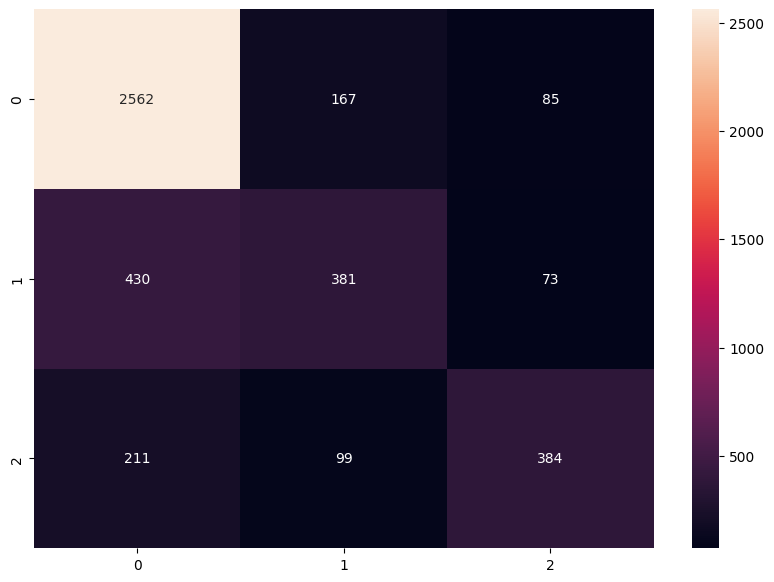

In [57]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, tf_idf_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1','2']],
                  columns = [i for i in ['0', '1','2']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

* This model is performing poorly just like the first one

thank,jetblue,southwestair,unite,http,americanair,great,usairways,flight,virginamerica,love,delay,cancel,get,hours,dm,amaze,please,fly,hold,good,bag,awesome,follow,wait,call,customer,make,us,time,service,best,would,help,need,go,guy,hour,airline,tomorrow,
 
 


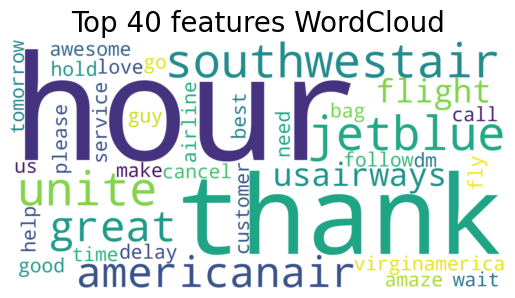

In [58]:
all_features = tfidf_vect.get_feature_names_out()            #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

* Words like **thank,hour,jetblue,delay,great** and many others, are among the top 40 words.

### Summary

* The CountVectorizer is giving us a better model than Term Frequency - Inverse Document Frequency
* During the Exploratory data analysis phase we noticed that most of reasons why some texts are negative is because of poor services like the booking procedures from the Airline companies and also poor misplacing of luggages.
* There were so many Null values from the data. In the future, the data engineers will need to look into this.
* For the model, we can do more hypertuning to give us better results.
* United Airline and USAirways are the Arlines that most people tweet about.